In [1]:
import warnings
warnings.simplefilter(action='ignore')

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1. 数据预处理

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
x_train_flatten = x_train.reshape(x_train.shape[0], 784).astype('float32')
x_test_flatten = x_test.reshape(x_test.shape[0], 784).astype('float32')

In [5]:
x_train_normalize = x_train_flatten / 255.0
x_test_normalize = x_test_flatten / 255.0

In [6]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train)
y_test_one_hot = tf.keras.utils.to_categorical(y_test)

### 2. 建立模型

#### 2.1 建立 Sequential 模型

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1000, input_dim=784, kernel_initializer='normal', activation='relu'),  # 输入层-隐藏层(这里隐藏层为1000个神经元)
    tf.keras.layers.Dropout(0.5),  # 添加 Dropout 层
    tf.keras.layers.Dense(units=10, kernel_initializer='normal', activation='softmax')  # 输出层
])

#### 2.2 查看模型的摘要

In [8]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              785000    
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


### 3. 训练模型

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
train_history = model.fit(x=x_train_normalize, y=y_train_one_hot, validation_split=0.2,
                         epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 6s - loss: 12.5889 - acc: 0.2132 - val_loss: 8.5766 - val_acc: 0.4606
Epoch 2/10
 - 6s - loss: 8.9286 - acc: 0.4399 - val_loss: 6.4463 - val_acc: 0.5967
Epoch 3/10
 - 6s - loss: 7.3299 - acc: 0.5411 - val_loss: 5.2655 - val_acc: 0.6690
Epoch 4/10
 - 6s - loss: 6.1830 - acc: 0.6118 - val_loss: 4.8476 - val_acc: 0.6966
Epoch 5/10
 - 6s - loss: 5.5846 - acc: 0.6496 - val_loss: 4.5499 - val_acc: 0.7151
Epoch 6/10
 - 7s - loss: 5.2927 - acc: 0.6680 - val_loss: 4.4172 - val_acc: 0.7237
Epoch 7/10
 - 6s - loss: 4.6555 - acc: 0.7070 - val_loss: 3.3079 - val_acc: 0.7922
Epoch 8/10
 - 6s - loss: 4.2692 - acc: 0.7315 - val_loss: 3.1796 - val_acc: 0.7995
Epoch 9/10
 - 6s - loss: 4.0309 - acc: 0.7461 - val_loss: 3.1166 - val_acc: 0.8041
Epoch 10/10
 - 6s - loss: 3.7557 - acc: 0.7634 - val_loss: 2.8592 - val_acc: 0.8195


### 4. 以图形显示训练过程

In [11]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel(train)
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

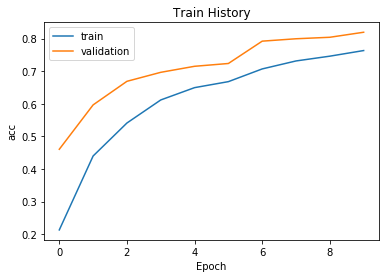

In [12]:
show_train_history(train_history, 'acc', 'val_acc')

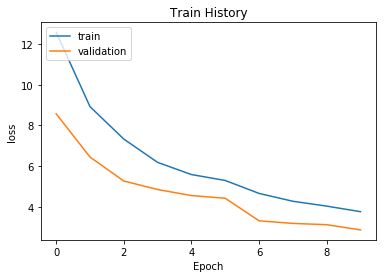

In [13]:
show_train_history(train_history, 'loss', 'val_loss')

### 5. 评估模型的准确率

In [14]:
scores = model.evaluate(x_test_normalize, y_test_one_hot)
print()
print('accuracy:', scores[1])

10000/10000 [==============================] - 1s 91us/step

accuracy: 0.8217


### 6. 进行预测

#### 6.1 执行预测

In [15]:
predictions = model.predict_classes(x_test_normalize)

#### 6.2 预测结果

In [16]:
predictions

array([9, 2, 1, ..., 4, 5, 6])

#### 6.3 定义函数以显示10项预测结果

In [17]:
def plot_images_labels_prediction(images, labels, predictions, idx, num=10):
    """
    images: 数字图像数组
    labels: 真实值数组
    predictions: 预测结果数据
    idx: 开始显示的数据index
    num: 要显示的数据项数, 默认为10, 不超过25
    """
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25:
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(images[idx], cmap='binary')
        title = 'lable=' + str(labels[idx])
        if len(predictions) > 0:
            title += ',predict=' + str(predictions[idx])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

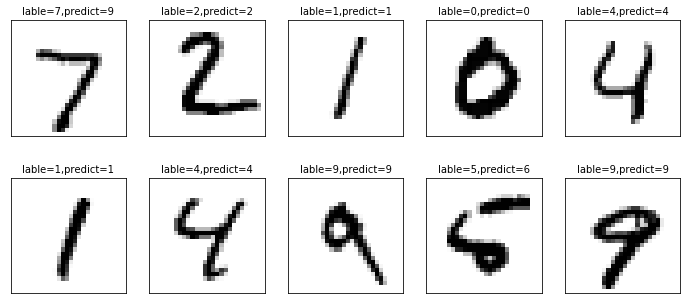

In [18]:
plot_images_labels_prediction(x_test, y_test, predictions, idx=0, num=10)

### 7. 显示混淆矩阵

#### 7.1 建立混淆矩阵

In [19]:
pd.crosstab(y_test, predictions, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,956,0,1,1,0,2,14,0,5,1
1,0,1103,14,1,1,2,6,0,7,1
2,19,3,908,18,9,2,30,3,30,10
3,5,3,18,895,1,51,6,0,14,17
4,1,0,4,3,911,0,25,1,5,32
5,10,4,7,27,8,798,24,0,10,4
6,13,3,2,1,8,17,914,0,0,0
7,31,29,57,36,43,2,6,79,13,732
8,19,14,27,42,19,45,31,4,753,20


#### 7.2 建立真实值与预测 DataFrame

In [20]:
df = pd.DataFrame({'label': y_test, 'predict': predictions})
df[:2]

,label,predict
0,7,9
1,2,2


#### 7.3 查询真实值是 "5" 但预测值是 "2" 的数据

In [21]:
df[(df.label==5)&(df.predict==2)]

,label,predict
1032,5,2
6324,5,2
6385,5,2
6392,5,2
6706,5,2
7542,5,2
7797,5,2


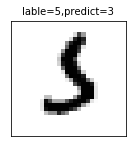

In [22]:
plot_images_labels_prediction(x_test, y_test, predictions, idx=340, num=1)

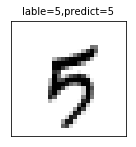

In [23]:
plot_images_labels_prediction(x_test, y_test, predictions, idx=1289, num=1)